In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import sys
from scipy.signal import find_peaks

# Insert the path of modules folder 
# sys.path.insert(0, 'C:/Users/MEDIA_LAB/thesis_project')
sys.path.append("../")

from support import *
from features.feature_ts import genX

### Load energy consumption data:


In [29]:
year_range = [1997,2014]

df = genX(year_range)

### Identify daily peaks


In [105]:
Household = 3

X = df.reset_index()
X1 = X[X.ProfileID == Household]
X1.drop('ProfileID', axis = 1, inplace = True)
X2 = X1.set_index('date').T

new_df = []

for column in X2.columns:
    # print(X2[column])
    new_df.append(list(X2[column].values))

flat_list = [item for sublist in new_df for item in sublist]

X3 = pd.DataFrame(flat_list, columns = ['Vals'])

C:\Users\MEDIA_LAB\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
fig = go.Figure(data=go.Scatter(
    y = X3.Vals,
    mode = 'lines'
))

fig.show()

In [107]:
from scipy.signal import find_peaks

indices = find_peaks(X3.Vals)[0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    y=X3.Vals,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=indices,
    y=[X3.Vals[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.show()

In [108]:
indices

array([   4,    8,   10, ..., 6944, 6949, 6953], dtype=int64)

In [220]:
X = genX(year_range, drop_0= True)

dropping all zero rows


In [268]:
X.reset_index(inplace = True)

In [286]:
my_dict = X[['ProfileID','date']].values.to_dict(orient = 'list')

AttributeError: 'numpy.ndarray' object has no attribute 'to_dict'

In [275]:

d = dict(enumerate(X[['ProfileID','date']].values.flatten(), 1))

In [296]:
X.Peaks[1]= 2

<ipython-input-296-80ae6a7fa521>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [297]:
X

,ProfileID,date,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,Peaks
0,3,1997-12-15,4.396250,0.673833,0.801250,0.808667,0.813250,0.802917,0.811750,1.048583,...,0.734750,0.730750,0.733833,0.761167,6.857833,8.509500,3.316750,6.862917,0.888250,2
1,3,1997-12-16,0.668250,0.740333,0.741583,0.799250,0.667583,0.800750,1.310417,5.723500,...,7.523250,7.920833,13.833750,7.974583,6.810083,0.838167,0.751833,0.749083,0.750667,2
2,3,1997-12-17,0.812167,0.751750,1.382000,6.623917,7.606583,9.273083,0.680833,0.818750,...,10.799750,12.174083,2.800333,2.352500,0.992833,0.813667,0.747500,0.731800,0.680667,1
3,3,1997-12-18,0.819167,2.835167,1.289583,10.299250,18.399250,8.888667,10.072917,10.472667,...,2.727917,5.839833,5.448583,6.026500,2.498167,3.977833,0.824750,0.826833,0.824500,1
4,3,1997-12-19,0.748833,0.996000,1.349750,4.972250,15.080083,5.327750,5.113417,0.833917,...,3.201750,1.503833,1.257083,2.615583,2.369167,1.901833,0.746000,0.741500,0.739333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166826,12029071,2014-09-29,0.400000,0.400000,0.193333,0.246667,1.733333,2.886667,0.440000,0.340000,...,0.773333,0.320000,0.406667,1.566667,0.686667,2.273333,1.620000,0.506667,0.400000,1
3166827,12029071,2014-09-30,0.400000,0.400000,0.400000,0.400000,0.400000,0.640000,0.620000,1.406667,...,0.233333,0.226667,0.360000,1.146667,0.980000,1.480000,1.886667,0.380000,0.293333,1
3166828,12029071,2014-10-01,0.380000,0.306667,0.280000,0.293333,0.273333,1.166667,0.366667,2.533333,...,0.280000,0.213333,0.280000,0.966667,1.726667,1.306667,3.000000,0.906667,0.340000,1
3166829,12029071,2014-10-02,0.293333,0.286667,0.286667,0.293333,1.433333,0.753333,0.200000,2.286667,...,0.246667,0.213333,0.340000,0.846667,2.200000,1.526667,0.646667,0.633333,0.340000,1


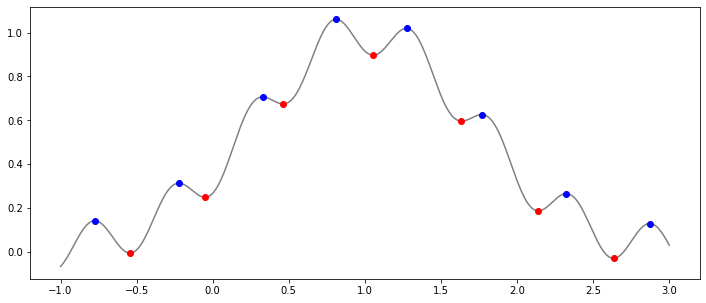

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# example data with peaks:
x = np.linspace(-1,3,1000)
data = -0.1*np.cos(12*x)+ np.exp(-(1-x)**2)

#     ___ detection of local minimums and maximums ___

a = np.diff(np.sign(np.diff(data))).nonzero()[0] + 1               # local min & max
b = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1         # local min
c = (np.diff(np.sign(np.diff(data))) < 0).nonzero()[0] + 1         # local max
# +1 due to the fact that diff reduces the original index number

# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='grey')
plt.plot(x[b], data[b], "o", label="min", color='r')
plt.plot(x[c], data[c], "o", label="max", color='b')
plt.show()

In [221]:
arrayX  = X.to_numpy().copy()
arrayY = X.to_numpy().copy()

In [243]:
arrayY.sort()
arrayY[0][len(arrayY[0])-2]
arrayY[0][len(arrayY[0])-3]

6.857833291093511

In [248]:
# Get differenct betewwn 3rd and 2nd largest values
diff = arrayY[0][len(arrayY[0])-2] - arrayY[0][len(arrayY[0])-3]
diff

0.0025417283177331385

In [256]:
diff = arrayY[i][len(arrayY[i])-2] - arrayY[i][len(arrayY[i])-3]
diff

0.6866667047142982

### Check how many loadprofile has only one reading

In [254]:
zero_counter = 0

arrayX  = X.to_numpy().copy()
arrayY = X.to_numpy().copy()

arrayY.sort()

for i in range(0,len(arrayX)):
    temp= arrayY[i][len(arrayY[i])-2]

    if temp == 0:
        zero_counter = zero_counter + 1

zero_counter

2391

### Check how many loadprofiles has two of the same amplitude peaks

In [255]:
peak1eqpeak2_counter = 0
peak2eqpeak3_counter = 0
peak1eqpeak2eqpeak3_counter = 0

arrayX  = X.to_numpy().copy()
arrayY = X.to_numpy().copy()

arrayY.sort()

for i in range(0,len(arrayX)):
    peak1= arrayY[i][len(arrayY[i])-1]
    peak2= arrayY[i][len(arrayY[i])-2]
    peak3= arrayY[i][len(arrayY[i])-3]

    if peak1 == peak2:
        peak1eqpeak2_counter = peak1eqpeak2_counter + 1
    if peak2 == peak3:
        peak2eqpeak3_counter = peak2eqpeak3_counter + 1
    if (peak1 == peak2):
        if peak1 == peak3:
            peak1eqpeak2eqpeak3_counter = peak1eqpeak2eqpeak3_counter + 1

print("There are {} profiles with peak1 == peak2".format(peak1eqpeak2_counter))
print("There are {} profiles with peak2 == peak3".format(peak2eqpeak3_counter))
print("There are {} profiles with peak1 == peak2 == peak 3".format(peak1eqpeak2eqpeak3_counter))



There are 38446 profiles with peak1 == peak2
There are 54827 profiles with peak1 == peak2
There are 23066 profiles with peak1 == peak2


### Check how many loadprofiles has only one non-zero peak

In [306]:
peak2null_counter = 0

# arrayX  = X.to_numpy().copy()
arrayY = X.to_numpy().copy()

arrayY.sort()

for i in range(0,len(arrayX)):

    peak2= arrayY[i][len(arrayY[i])-2]

    if peak2 == 0:
        peak2null_counter = peak2null_counter + 1


print("There are {} profiles with peak2 == 0".format(peak2null_counter))

There are 2391 profiles with peak2 == 0


### Identify the two largest peaks

In [3]:
year_range = [1994, 2014]
X = genX(year_range, drop_0= True)
# X.reset_index(inplace = True)

# counter = 0
df = X.copy()
arrayX  = X.to_numpy().copy()
arrayY = X.to_numpy().copy()

arrayY.sort()
df.reset_index(inplace=True)
df['ToP'] = 'NaN'

for i in range(0,len(arrayX)):

    diff = arrayY[i][len(arrayY[i])-2] -arrayY[i][len(arrayY[i])-3]
    threshold = arrayY[i][len(arrayY[i])-2] - (diff/2)

    indices = find_peaks(arrayX[i], height = threshold)[0]
    
    # df['ToP'][i] = [indices]
    
    # if len(indices) == 2:
        


dropping all zero rows


### TRY A FASTER WAY TO STORE PEAK VALUES

In [8]:
from collections import defaultdict

# Load data
year_range = [1994, 2014]
X = genX(year_range, drop_0= True)

# df = X.copy()
arrayX  = X.to_numpy().copy()
arrayY = X.to_numpy().copy()
arrayY.sort()

dict_t = defaultdict(list)

for i in range(0,len(arrayX)):

    diff = arrayY[i][len(arrayY[i])-2] -arrayY[i][len(arrayY[i])-8]
    threshold = arrayY[i][len(arrayY[i])-2] - diff
    distance = 5

    indices = find_peaks(arrayX[i], distance=distance, height = threshold)[0]

    dict_t[i].append(indices)

dropping all zero rows


In [10]:
dict_t

defaultdict(list,
            {0: [array([13, 18], dtype=int64)],
             1: [array([13, 21], dtype=int64)],
             2: [array([ 6, 21], dtype=int64)],
             3: [array([ 6, 16, 21], dtype=int64)],
             4: [array([10, 20], dtype=int64)],
             5: [array([ 6, 15, 20], dtype=int64)],
             6: [array([ 6, 11, 19], dtype=int64)],
             7: [array([ 5, 11], dtype=int64)],
             8: [array([ 5, 12], dtype=int64)],
             9: [array([14, 19], dtype=int64)],
             10: [array([ 3, 18], dtype=int64)],
             11: [array([ 6, 11, 21], dtype=int64)],
             12: [array([10, 17], dtype=int64)],
             13: [array([ 4,  9, 21], dtype=int64)],
             14: [array([ 9, 15], dtype=int64)],
             15: [array([ 8, 21], dtype=int64)],
             16: [array([ 6, 11, 21], dtype=int64)],
             17: [array([ 1,  7, 22], dtype=int64)],
             18: [array([ 7, 17, 22], dtype=int64)],
             19: [array([ 9, 

In [11]:
new = pd.DataFrame.from_dict(dict_t)

In [44]:
len(arrayX)

3252833

In [217]:
# Number of loadprofiles
len(arrayX)

3210598

In [223]:
# Number of loadprofiles after drop_0
len(arrayX)

3166831

In [213]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.00001
# Number of profiles with 2 peaks
counter

1603762

In [228]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.01
# Number of profiles with 2 peaks
counter

1566211

In [216]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.00001
# Number of loadprofiles with more than two peaks
counter

12669

In [226]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.00001
# Number of loadprofiles with more than two peaks (DROP_0 = True)
counter

1603762

In [250]:
#     diff = arrayY[i][len(arrayY[i])-2] -arrayY[i][len(arrayY[i])-3]
#     threshold = arrayY[i][len(arrayY[i])-2] - (diff/2)
# Number of loadprofiles = two peaks
counter

1604707

In [252]:
#     diff = arrayY[i][len(arrayY[i])-2] -arrayY[i][len(arrayY[i])-3]
#     threshold = arrayY[i][len(arrayY[i])-2] - (diff/2)
# Number of loadprofiles more than two peaks
counter

8704

In [219]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.00001
# Number of loadprofiles with 1 peak
counter

1506185

In [224]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.00001
# Number of loadprofiles with 1 peak (DROP_0 = True)
counter

1506185

In [234]:
# Threshold = arrayY[i][len(arrayY[i])-2]
# Number of loadprofiles with 1 peak (DROP_0 = True)
counter

1509099

In [242]:
# Threshold = arrayY[i][len(arrayY[i])-2]
# Number of loadprofiles with 0 peak (DROP_0 = True)
# Number of loadprofile where the morning peak and afternoon peak are the same
counter

44344

In [230]:
# Number of loadprofiles with 1 peaks
counter

26620

In [232]:
# Threshold = arrayY[i][len(arrayY[i])-2] - 0.00001
# Number of loadprofiles with 1 peak (DROP_0 = True)
counter

1506185